In [1]:
import pandas as pd

In [2]:
accepted = pd.read_csv("accepted_2007_to_2018Q4.csv")

C:\Users\orteg\AppData\Local\Temp\ipykernel_15060\315921789.py:1: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types. Specify dtype option on import or set low_memory=False.
  accepted = pd.read_csv("accepted_2007_to_2018Q4.csv")


In [ ]:
accepted.shape

In [ ]:
#accepted.columns.values

In [3]:
rejected = pd.read_csv("rejected_2007_to_2018Q4.csv")

In [ ]:
rejected.shape

In [ ]:
#rejected.columns.values

In [4]:
accepted['Applicant_Result'] = 1
rejected['Applicant_Result'] = 0

### Creating a dataset for zip codes only

In [ ]:
accepted['zip_code'].isnull().sum()

In [ ]:
rejected['Zip Code'].isnull().sum()

Since there are only a few missing values in the zip code columns, I will drop the rows. First I will concatenate the needed columns, and then I will drop the rows.

In [ ]:
rejected['Zip Code'].isnull().sum()/len(rejected)

In [ ]:
accepted['zip_code'].isnull().sum()/len(accepted)

In [5]:
zip_df = rejected[['Zip Code', 'Applicant_Result']].rename(columns=
                                                           {"Zip Code": "zip_code", "Applicant_Result": "applicant_result"})

In [6]:
zip_df = pd.concat([zip_df, accepted[['zip_code', 'Applicant_Result']].rename(columns={"Applicant_Result": "applicant_result"})]
                   , axis=0)

In [ ]:
zip_df.head()

In [ ]:
zip_df['applicant_result'].value_counts()

In [ ]:
zip_df['zip_code'].value_counts()

In [7]:
zip_df.dropna(axis=0, inplace=True)

In [ ]:
zip_df.isnull().sum()

In [ ]:
zip_df.info()

In [8]:
zip_df.reset_index(drop=True, inplace=True)

### Selecting the Columns Related to the Project Proposal from the Accepted Dataset

In [ ]:
accepted.info()

In [ ]:
null_values = accepted.isnull().sum().sort_values(ascending = False)

In [ ]:
#for row, index in enumerate(null_values.index):
 #   print(f"{null_values[row]} missing values for {index}")

In [9]:
col_to_be_dropped = []
for column in accepted.columns:
    if (accepted[column].isnull().sum()/len(accepted)) > 0.3:
        col_to_be_dropped.append(column)

In [10]:
trimmed_accepted = accepted.drop(col_to_be_dropped, axis = 1)

In [ ]:
trimmed_accepted.shape

In [ ]:
null_values = trimmed_accepted.isnull().sum().sort_values(ascending = False)

In [ ]:
#for row, index in enumerate(null_values.index):
 #   print(f"{null_values[row]} missing values for {index}")

Now all columns that we want to use will be selected from the trimmed dataset

In [11]:
columns_needed = ['loan_amnt', 'title', 'fico_range_low', 'fico_range_high',
                 'dti', 'zip_code', 'addr_state', 'emp_length', 'emp_title', 
                 'funded_amnt', 'hardship_flag', 'home_ownership', 'loan_status', 
                 'application_type', 'issue_d', 'policy_code', 'Applicant_Result']

In [12]:
accepted_project = trimmed_accepted[columns_needed]

In [ ]:
accepted_project.head()

Below, I am checking the each data type. If there is a column that does not have an appropriate data type, it will be changed after the NA values are dealt with.

In [ ]:
accepted_project.info()

In [ ]:
accepted_project['home_ownership'].value_counts()

In [ ]:
accepted_project['loan_status'].value_counts()

In [ ]:
accepted_project['application_type'].value_counts()

### Imputing Data

In [ ]:
accepted_project.isnull().sum().sort_values(ascending = False)

The question now is, how can I impute the data? First, I will look at why some of the missing rows.

In [ ]:
accepted_project[accepted_project['loan_amnt'].isnull()]

There appears to be a subset of the data, 33 rows, that have no data. These rows will be dropped.

In [13]:
accepted_project.dropna(subset=['loan_amnt'], axis=0, inplace=True)

C:\Users\orteg\AppData\Local\Temp\ipykernel_15060\396850192.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accepted_project.dropna(subset=['loan_amnt'], axis=0, inplace=True)


In [14]:
accepted_project.isnull().sum().sort_values(ascending = False)

emp_title           166969
emp_length          146907
title                23325
dti                   1711
zip_code                 1
home_ownership           0
policy_code              0
issue_d                  0
application_type         0
loan_status              0
loan_amnt                0
hardship_flag            0
funded_amnt              0
addr_state               0
fico_range_high          0
fico_range_low           0
Applicant_Result         0
dtype: int64

The remaining columns with missing values will be treated differently. Each column will be examined based on the distribution of known its known values and other columns. The goal is to find out if the missing values are random or correlated to something.

In [15]:
import matplotlib.pyplot as plt

#### DTI

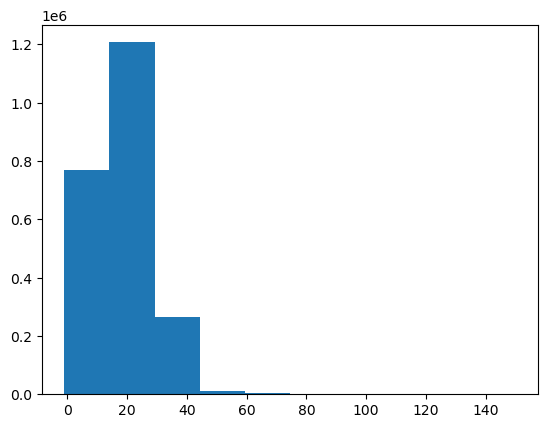

In [17]:
plt.hist(accepted_project['dti'][accepted_project['dti'] < 150])
plt.show()

In [ ]:
accepted_project[accepted_project['dti'].isnull()].describe()

In [ ]:
accepted_project.dropna(subset=['dti']).describe()

In [18]:
accepted_project.dropna(subset=['dti']).describe().compare(accepted_project[accepted_project['dti'].isnull()].describe(),
                                                           align_axis=1)

loan_amnt               fico_range_low              fico_range_high  \
               self         other           self        other            self   
count  2.258957e+06   1711.000000   2.258957e+06  1711.000000    2.258957e+06   
mean   1.504386e+04  19101.797195   6.985790e+02   710.803624    7.025791e+02   
std    9.188071e+03  10992.396631   3.300464e+01    37.962894    3.300550e+01   
min    5.000000e+02   1000.000000   6.100000e+02   660.000000    6.140000e+02   
25%    8.000000e+03  10000.000000   6.750000e+02   680.000000    6.790000e+02   
50%    1.290000e+04  17000.000000   6.900000e+02   705.000000    6.940000e+02   
75%    2.000000e+04  28000.000000   7.150000e+02   730.000000    7.190000e+02   
max             NaN           NaN            NaN          NaN             NaN   

                             dti         funded_amnt                \
             other          self other          self         other   
count  1711.000000  2.258957e+06   0.0  2.258957e+06   1711.000000   
mean    714.804793  1.882420e+01   NaN  1.503859e+04  19101.797195   
std      37.967043  1.418333e+01   NaN  9.186235e+03  10992.396631   
min     664.000000 -1.000000e+00   NaN  5.000000e+02   1000.000000   
25%     684.000000  1.189000e+01   NaN  8.000000e+03  10000.000000   
50%     709.000000  1.784000e+01   NaN  1.285000e+04  17000.000000   
75%     734.000000  2.449000e+01   NaN  2.000000e+04  28000.000000   
max            NaN  9.990000e+02   NaN           NaN           NaN   

      policy_code         Applicant_Result          
             self   other             self   other  
count   2258957.0  1711.0        2258957.0  1711.0  
mean          NaN     NaN              NaN     NaN  
std           NaN     NaN              NaN     NaN  
min           NaN     NaN              NaN     NaN  
25%           NaN     NaN              NaN     NaN  
50%           NaN     NaN              NaN     NaN  
75%           NaN     NaN              NaN     NaN  
max           NaN     NaN              NaN     NaN

In [19]:
accepted_project.columns

Index(['loan_amnt', 'title', 'fico_range_low', 'fico_range_high', 'dti',
       'zip_code', 'addr_state', 'emp_length', 'emp_title', 'funded_amnt',
       'hardship_flag', 'home_ownership', 'loan_status', 'application_type',
       'issue_d', 'policy_code', 'Applicant_Result'],
      dtype='object')

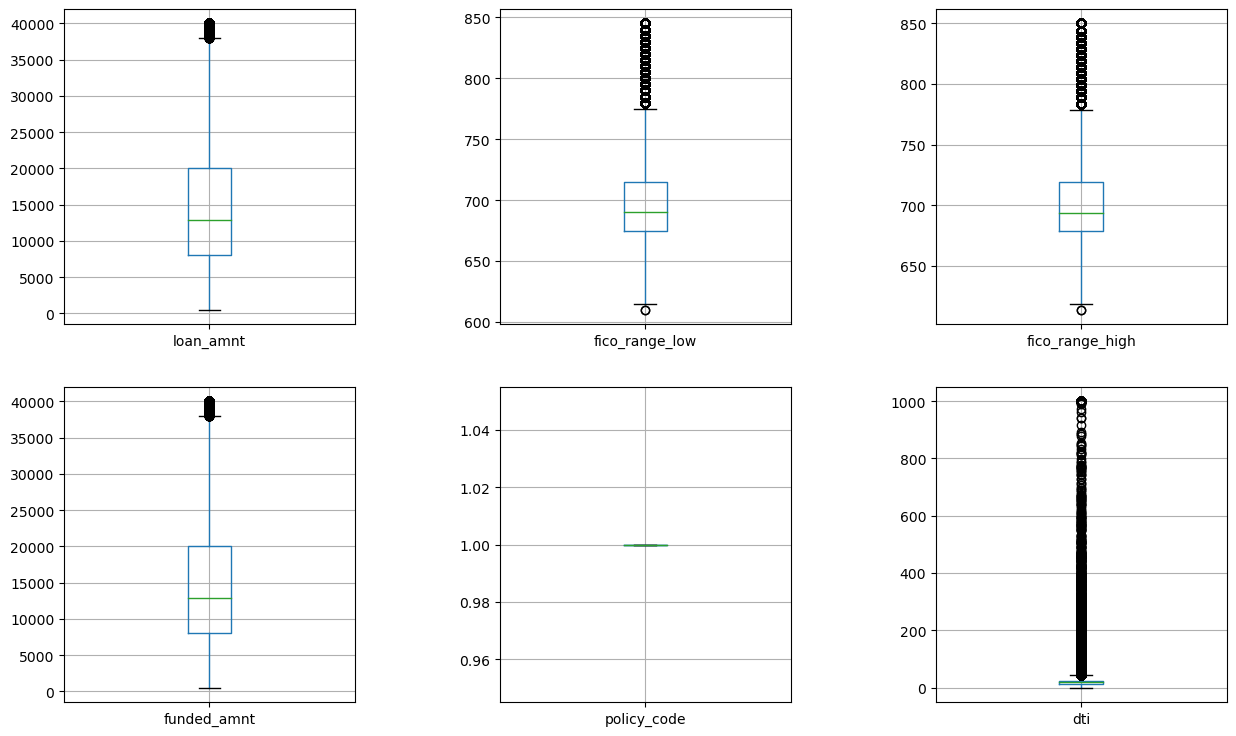

In [20]:
fig, ax = plt.subplots(2, 3, figsize=(15, 9))

accepted_project.dropna(subset=['dti']).boxplot('loan_amnt', ax=ax[0,0])
accepted_project.dropna(subset=['dti']).boxplot('fico_range_low', ax=ax[0,1])
accepted_project.dropna(subset=['dti']).boxplot('fico_range_high', ax=ax[0,2])
accepted_project.dropna(subset=['dti']).boxplot('dti', ax=ax[1,2])
accepted_project.dropna(subset=['dti']).boxplot('funded_amnt', ax=ax[1,0])
accepted_project.dropna(subset=['dti']).boxplot('policy_code', ax=ax[1,1])

plt.subplots_adjust(wspace=0.5) 

plt.show()

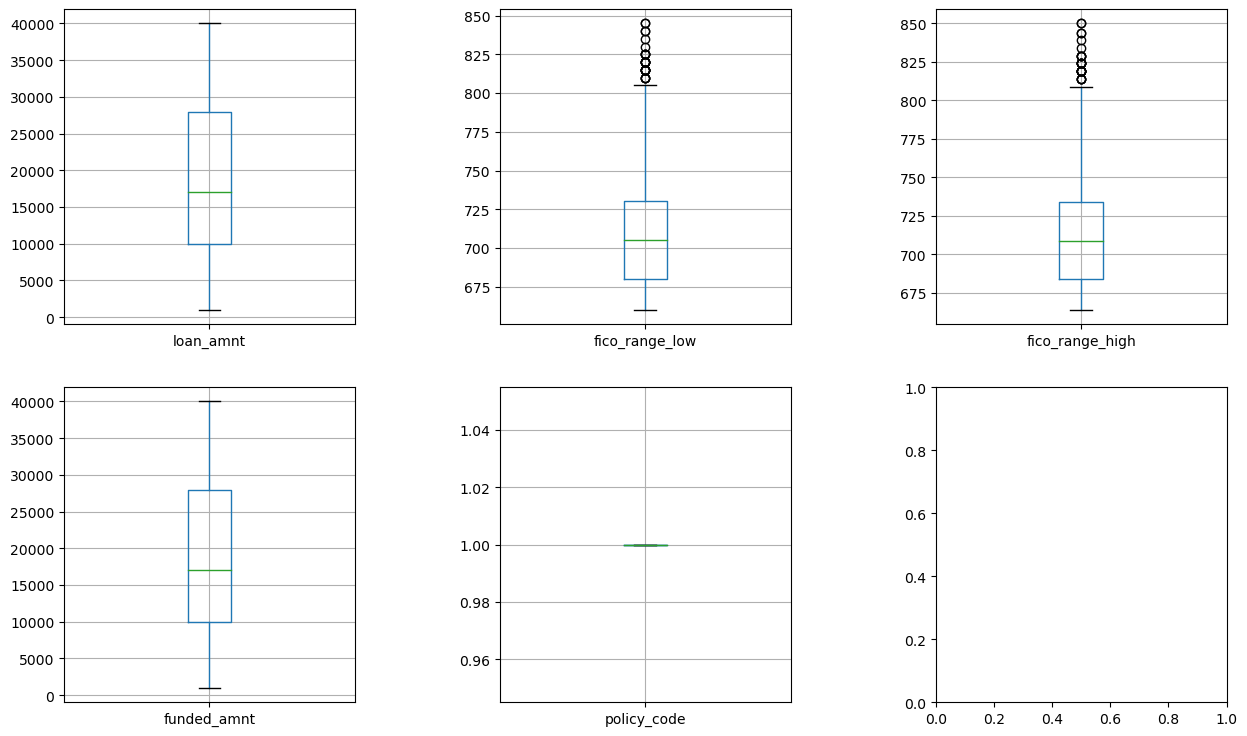

In [24]:
fig, ax = plt.subplots(2, 3, figsize=(15, 9))

accepted_project[accepted_project['dti'].isnull()].boxplot('loan_amnt', ax=ax[0,0])
accepted_project[accepted_project['dti'].isnull()].boxplot('fico_range_low', ax=ax[0,1])
accepted_project[accepted_project['dti'].isnull()].boxplot('fico_range_high', ax=ax[0,2])
accepted_project[accepted_project['dti'].isnull()].boxplot('funded_amnt', ax=ax[1,0])
accepted_project[accepted_project['dti'].isnull()].boxplot('policy_code', ax=ax[1,1])

plt.subplots_adjust(wspace=0.5) 

plt.show()

In [50]:
null_test = accepted_project[accepted_project['dti'].isnull()]

In [51]:
test = accepted_project.dropna(subset=['dti'])

In [54]:
for column in accepted_project[['title', 'zip_code', 'addr_state', 'emp_length', 'emp_title', 'hardship_flag', 
                                'home_ownership', 'loan_status', 'application_type', 'issue_d', 'Applicant_Result']].columns:
    print(f"Null Data:\n{null_test[column].value_counts()} \nDropped Data:\n{test[column].value_counts()}")

Null Data:
 Debt consolidation         990
Credit card refinancing    333
Home improvement           143
Other                      107
Moving and relocation       31
Major purchase              29
Medical expenses            28
Business                    17
Car financing               11
Home buying                 11
Vacation                     5
Green loan                   1
Name: title, dtype: int64 
Dropped Data:
 Debt consolidation             1152303
Credit card refinancing         469358
Home improvement                137294
Other                           127607
Major purchase                   44811
                                ...   
Credit Card Family Recovery          1
help pay bill                        1
Credit Home Improvement              1
GREAT FUTURE                         1
debt reduction/hone updates          1
Name: title, Length: 63155, dtype: int64
Null Data:
 750xx    27
852xx    27
923xx    23
840xx    21
760xx    20
         ..
916xx     1
914xx   

Some observations:

-The application type for the missing data contains only joint.
-Most of the columns align are fairly similar. Value counts are in slightly different orders but nothing extreme.

I consider this column to have MAR data.

#### Title

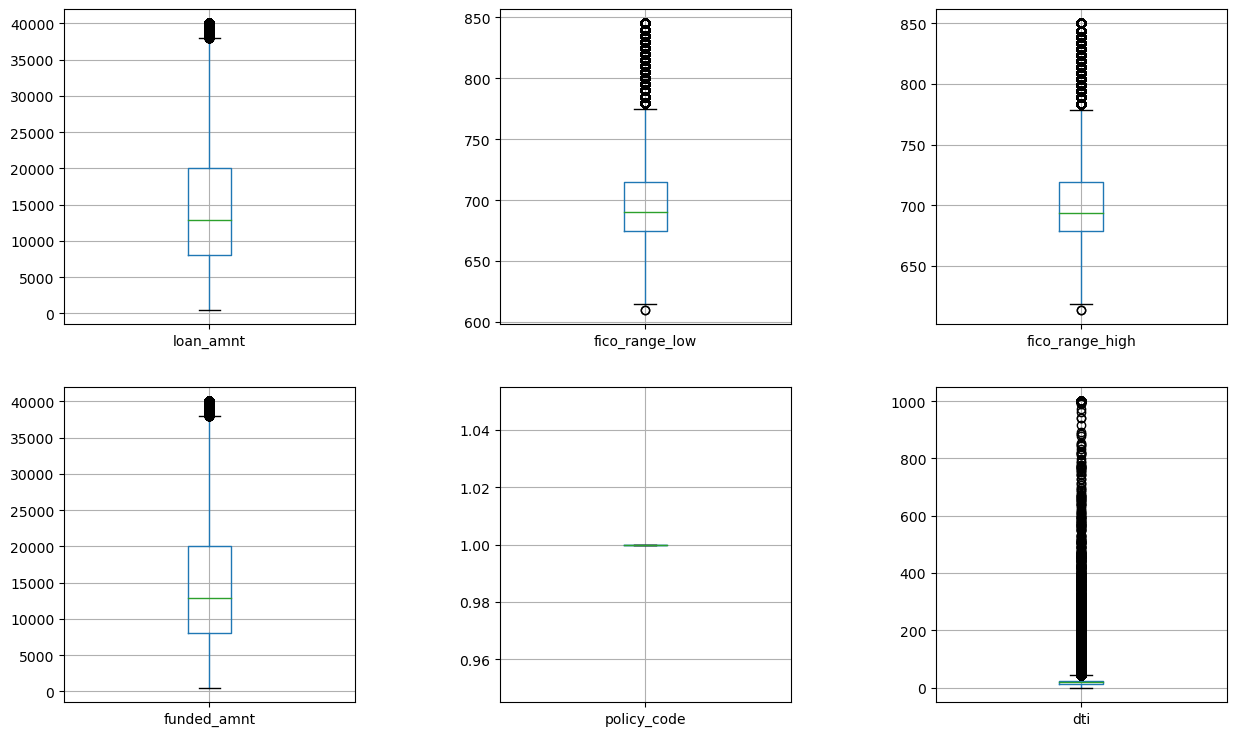

In [55]:
fig, ax = plt.subplots(2, 3, figsize=(15, 9))

accepted_project.dropna(subset=['title']).boxplot('loan_amnt', ax=ax[0,0])
accepted_project.dropna(subset=['title']).boxplot('fico_range_low', ax=ax[0,1])
accepted_project.dropna(subset=['title']).boxplot('fico_range_high', ax=ax[0,2])
accepted_project.dropna(subset=['title']).boxplot('dti', ax=ax[1,2])
accepted_project.dropna(subset=['title']).boxplot('funded_amnt', ax=ax[1,0])
accepted_project.dropna(subset=['title']).boxplot('policy_code', ax=ax[1,1])

plt.subplots_adjust(wspace=0.5) 

plt.show()

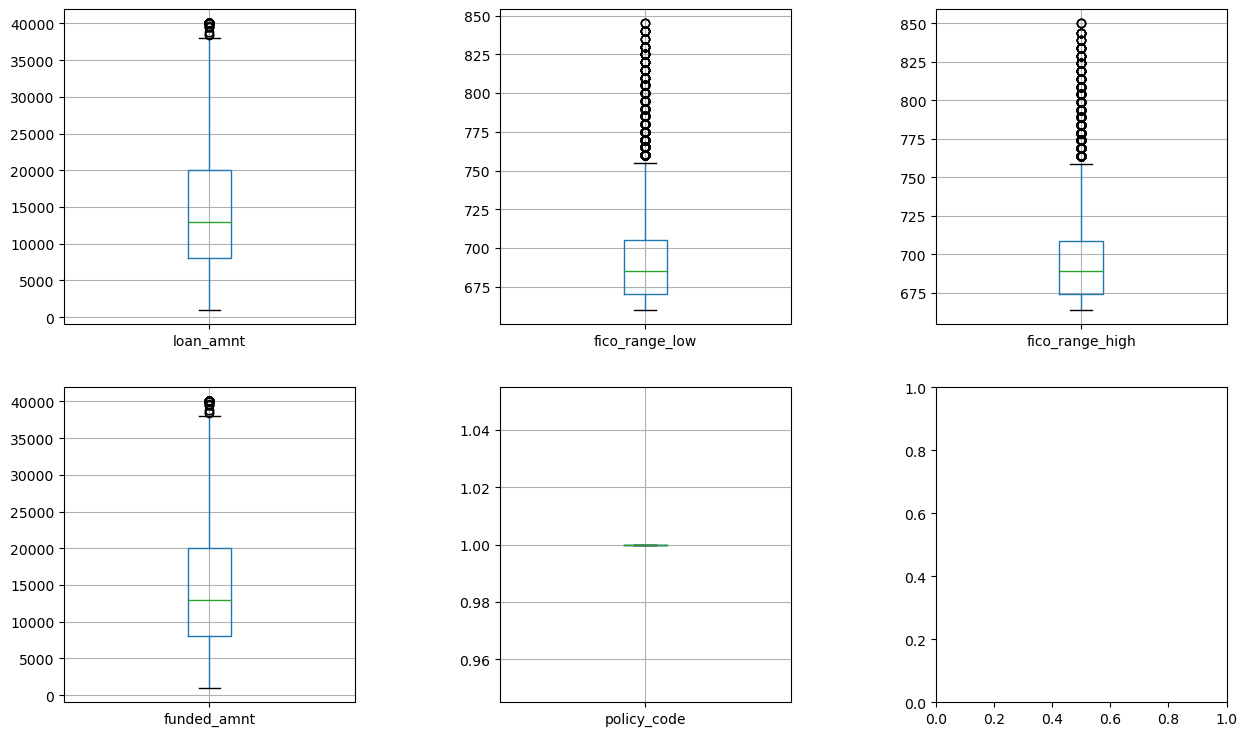

In [56]:
fig, ax = plt.subplots(2, 3, figsize=(15, 9))

accepted_project[accepted_project['title'].isnull()].boxplot('loan_amnt', ax=ax[0,0])
accepted_project[accepted_project['title'].isnull()].boxplot('fico_range_low', ax=ax[0,1])
accepted_project[accepted_project['title'].isnull()].boxplot('fico_range_high', ax=ax[0,2])
accepted_project[accepted_project['title'].isnull()].boxplot('funded_amnt', ax=ax[1,0])
accepted_project[accepted_project['title'].isnull()].boxplot('policy_code', ax=ax[1,1])

plt.subplots_adjust(wspace=0.5) 

plt.show()

#### Employee Length

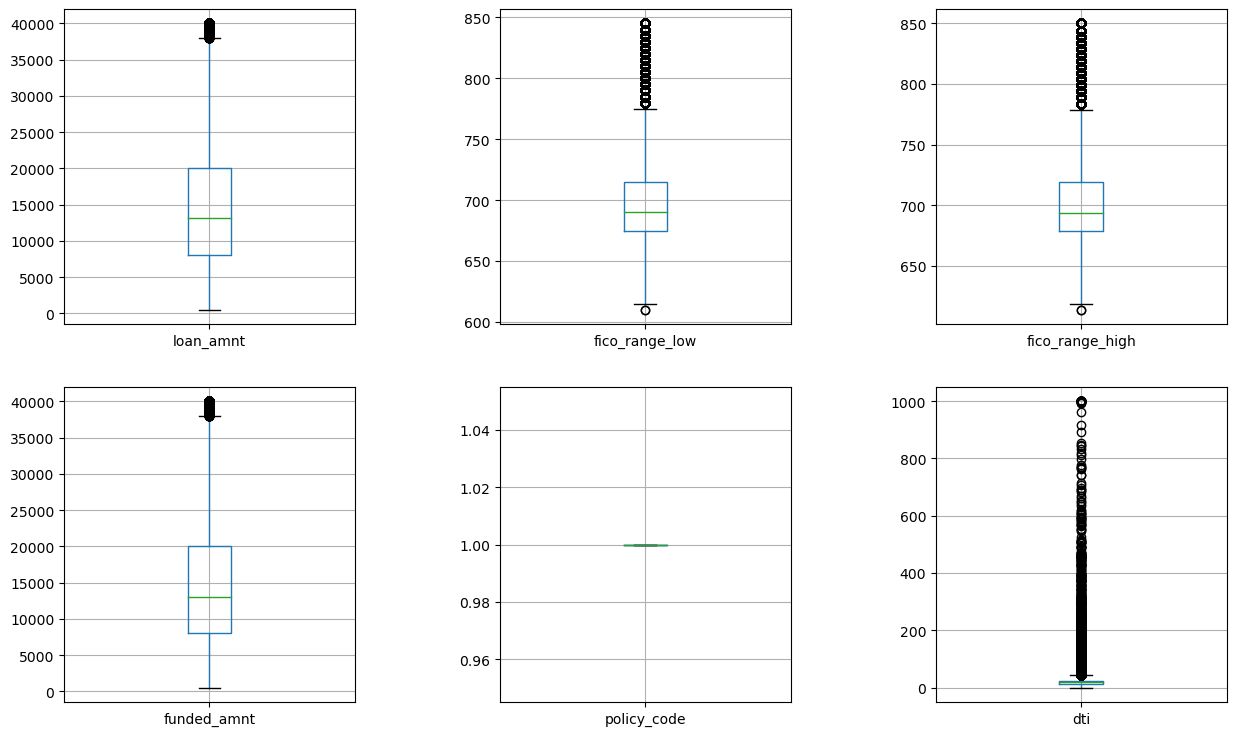

In [57]:
fig, ax = plt.subplots(2, 3, figsize=(15, 9))

accepted_project.dropna(subset=['emp_length']).boxplot('loan_amnt', ax=ax[0,0])
accepted_project.dropna(subset=['emp_length']).boxplot('fico_range_low', ax=ax[0,1])
accepted_project.dropna(subset=['emp_length']).boxplot('fico_range_high', ax=ax[0,2])
accepted_project.dropna(subset=['emp_length']).boxplot('dti', ax=ax[1,2])
accepted_project.dropna(subset=['emp_length']).boxplot('funded_amnt', ax=ax[1,0])
accepted_project.dropna(subset=['emp_length']).boxplot('policy_code', ax=ax[1,1])

plt.subplots_adjust(wspace=0.5) 

plt.show()

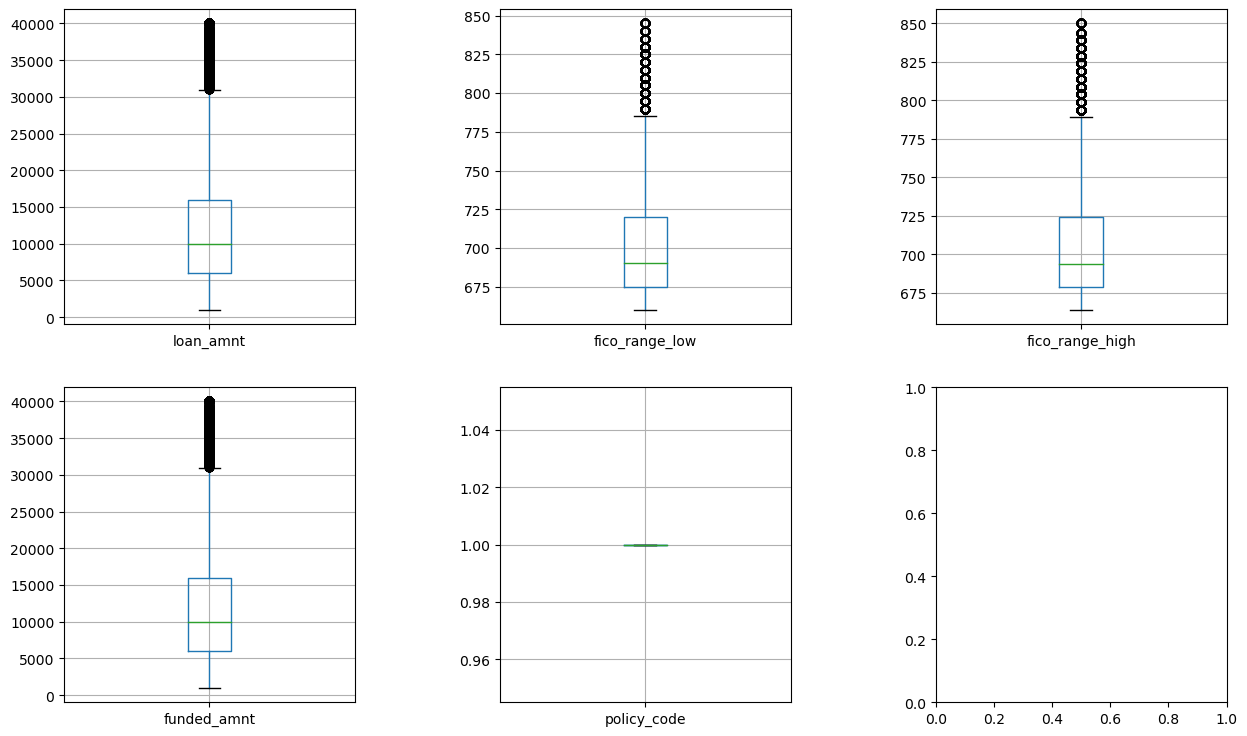

In [58]:
fig, ax = plt.subplots(2, 3, figsize=(15, 9))

accepted_project[accepted_project['emp_length'].isnull()].boxplot('loan_amnt', ax=ax[0,0])
accepted_project[accepted_project['emp_length'].isnull()].boxplot('fico_range_low', ax=ax[0,1])
accepted_project[accepted_project['emp_length'].isnull()].boxplot('fico_range_high', ax=ax[0,2])
accepted_project[accepted_project['emp_length'].isnull()].boxplot('funded_amnt', ax=ax[1,0])
accepted_project[accepted_project['emp_length'].isnull()].boxplot('policy_code', ax=ax[1,1])

plt.subplots_adjust(wspace=0.5) 

plt.show()

len(accepted_project_cut)/len(accepted_project) = 0.9168417229876927

I think that having over 90% is acceptable.

In [ ]:
accepted_project.dropna(axis=0, inplace=True)

In [ ]:
accepted_project['last_fico_range_low'] = accepted_project['last_fico_range_low'].astype('int64')
accepted_project['last_fico_range_high'] = accepted_project['last_fico_range_high'].astype('int64')
accepted_project['policy_code'] = accepted_project['policy_code'].astype('int64')

In [ ]:
accepted_project.reset_index(drop=True, inplace=True)

In [ ]:
accepted_project.info()

In [ ]:
#accepted_project.to_csv("accepted_only_data.csv")

### Process the Rejected Dataset and Combine Accepted into Equally Split Dataset

In [ ]:
rejected.info()

In [ ]:
rejected.isnull().sum()

Risk Score has too many missing values and will be excluded from the dataset.

In [ ]:
trimmed_rejected = rejected.drop(['Risk_Score'], axis=1)

In [ ]:
trimmed_rejected.info()

In [ ]:
trimmed_rejected['Employment Length'].isnull().sum()/len(trimmed_rejected)

In a similar case to the accepted dataset, the missing data does not make up a large percentage of the data. I will drop the missing rows instead of imputing.

In [ ]:
trimmed_rejected.dropna(axis=0, inplace=True)

In [ ]:
trimmed_rejected.reset_index(drop=True, inplace=True)

In [ ]:
trimmed_rejected['Policy Code'] = trimmed_rejected['Policy Code'].astype('int64')

In [ ]:
trimmed_rejected.info()

In [ ]:
trimmed_rejected['Debt-To-Income Ratio'] = trimmed_rejected['Debt-To-Income Ratio'].str.replace('%', '', regex=True)

In [ ]:
trimmed_rejected['Debt-To-Income Ratio'] = trimmed_rejected['Debt-To-Income Ratio'].astype('float64')

#### Checking the Data for Both Accepted and Rejected

In [ ]:
#for column in trimmed_rejected.columns:
 #   print(trimmed_rejected[column].value_counts())

In [ ]:
#for column in accepted_project.columns:
 #   print(accepted_project[column].value_counts())

In [ ]:
matching_columns_accepted = ['loan_amnt', 'title', 'dti', 'zip_code', 'addr_state', 'emp_length', 'policy_code', 
                             'Applicant_Result']

In [ ]:
matching_columns_rejected = ['Amount Requested', 'Loan Title', 'Debt-To-Income Ratio', 'Zip Code', 'State', 'Employment Length', 
                             'Policy Code', 'Applicant_Result']

In [ ]:
rand_accepted = accepted_project[matching_columns_accepted].sample(n = 100000, random_state = 42, replace = False)

In [ ]:
rand_accepted.rename(columns={"Applicant_Result": "applicant_result", "loan_amnt": "amount_requested", "dti": "debt_to_income_ratio", 
                             "addr_state": "state", "title": "reason_for_loan"}, inplace=True)

In [ ]:
rand_rejected = trimmed_rejected[matching_columns_rejected].sample(n = 100000, random_state = 42, replace = False)

In [ ]:
rand_rejected.rename(columns={"Applicant_Result": "applicant_result", "Amount Requested": "amount_requested", 
                              "Loan Title": "reason_for_loan", "Zip Code": "zip_code", "Debt-To-Income Ratio": "debt_to_income_ratio", 
                             "State": "state", "Policy Code": "policy_code", "Employment Length": "emp_length"}, inplace=True)

In [ ]:
learning_data = pd.concat([rand_accepted, rand_rejected], axis=0, ignore_index=True)

In [ ]:
learning_data.head()

In [ ]:
learning_data.info()

In [ ]:
learning_data['policy_code'].value_counts()

Because there is such a high count of 1 values from the accepted dataset, I will assume that 0 is 1 and 2 is 2 in the rejected dataset.

In [ ]:
learning_data['policy_code'] = learning_data['policy_code'].replace(to_replace=0,value=1)

In [ ]:
learning_data['policy_code'].value_counts()

In [ ]:
zip_df.to_csv("zip_only_data.csv")

In [ ]:
learning_data.to_csv("model_only_data.csv")

In [ ]:
accepted_project.to_csv("accepted_only_data.csv")